In [127]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [14]:
nifty_1day = pd.read_csv("../../Data/Nifty/nifty_1day.csv")
nifty_1day['datetime'] =  pd.to_datetime(nifty_1day['datetime'], format='%Y-%m-%d %H:%M:%S')
nifty_1day['datetime'] = nifty_1day['datetime'].dt.date
nifty_1day.drop(columns=['stock_code'],inplace=True)
nifty_1day["pct_returns"] = nifty_1day["close"].pct_change()
nifty_1day["abs_returns"] = nifty_1day["close"].diff()
nifty_1day['cumsum'] = nifty_1day['abs_returns'].cumsum()
nifty_1day["cumulative_returns"] = (1 + nifty_1day["pct_returns"]).cumprod() - 1
nifty_1day["pct_returns"] = nifty_1day["pct_returns"] * 100

In [15]:
nifty_1day

,datetime,open,high,low,close,volume,pct_returns,abs_returns,cumsum,cumulative_returns
0,2007-01-02,3966.25,4016.65,3964.95,4007.40,277443911,NaN,NaN,NaN,NaN
1,2007-01-03,4007.70,4029.80,3985.00,4024.05,336972857,0.415481,16.65,16.65,0.004155
2,2007-01-04,4027.30,4041.00,3979.80,3988.80,369793444,-0.875983,-35.25,-18.60,-0.004641
3,2007-01-05,3990.15,4011.45,3969.65,3983.40,363396365,-0.135379,-5.40,-24.00,-0.005989
4,2007-01-08,3983.30,3987.45,3913.00,3933.40,345887697,-1.255209,-50.00,-74.00,-0.018466
...,...,...,...,...,...,...,...,...,...,...
3850,2022-11-01,18130.70,18175.80,18060.15,18145.40,248784199,0.739499,133.20,14138.00,3.527973
3851,2022-11-02,18177.90,18178.75,18048.65,18082.85,2053916079,-0.344715,-62.55,14075.45,3.512365
3852,2022-11-03,17968.35,18106.30,17959.20,18052.70,250997227,-0.166733,-30.15,14045.30,3.504841
3853,2022-11-04,18053.40,18135.10,18017.15,18117.15,263180073,0.357010,64.45,14109.75,3.520924


<AxesSubplot: xlabel='datetime'>

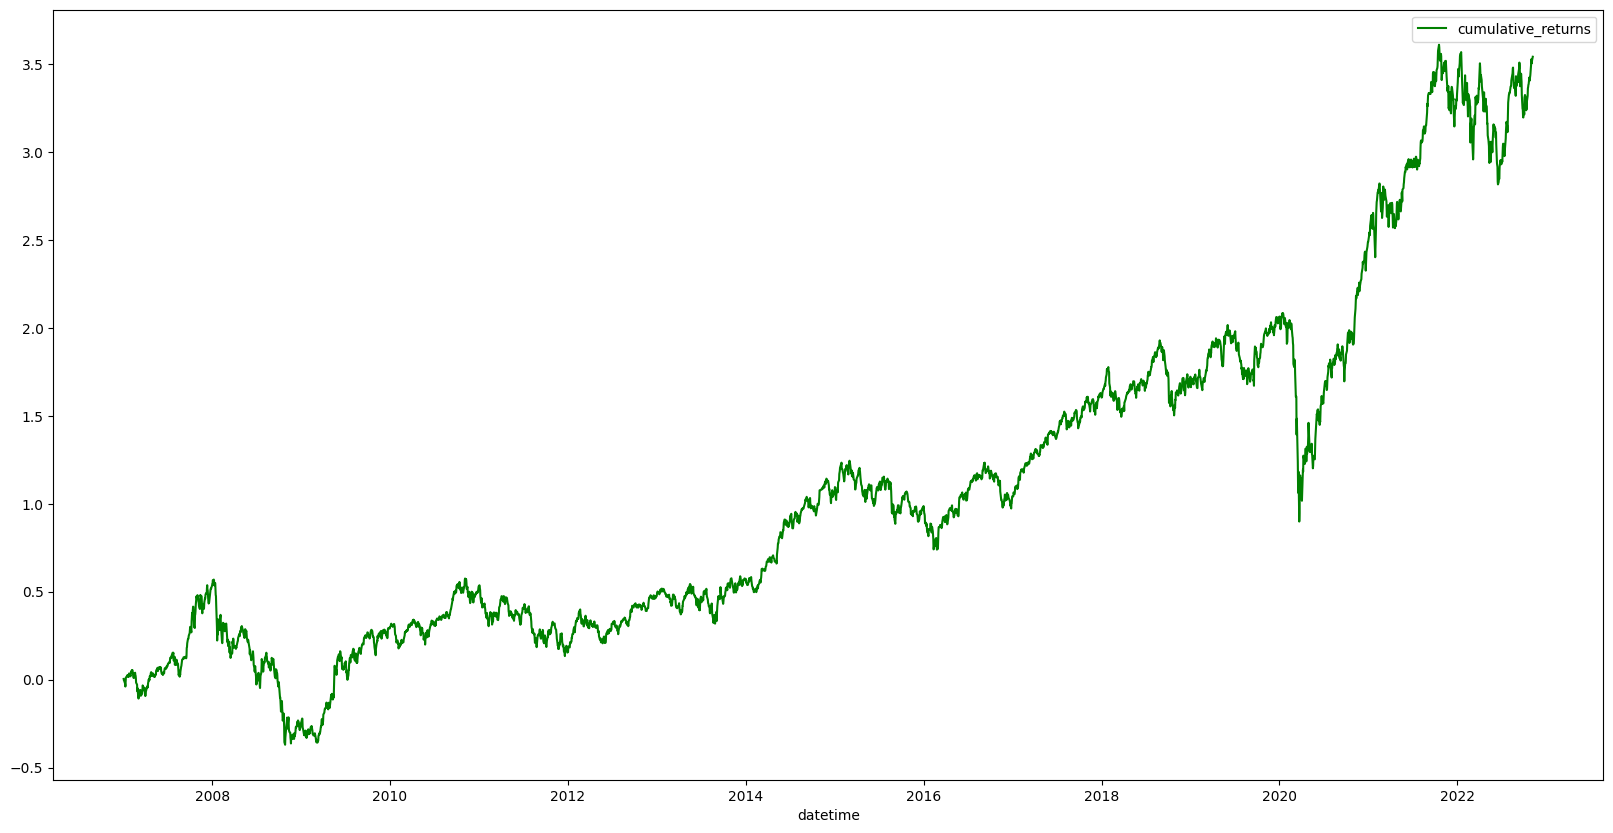

In [4]:
## cumulative returns in percentage 
nifty_1day.plot(x = 'datetime', y = ['cumulative_returns'], figsize=(20,10), color = "green")

<AxesSubplot: xlabel='datetime'>

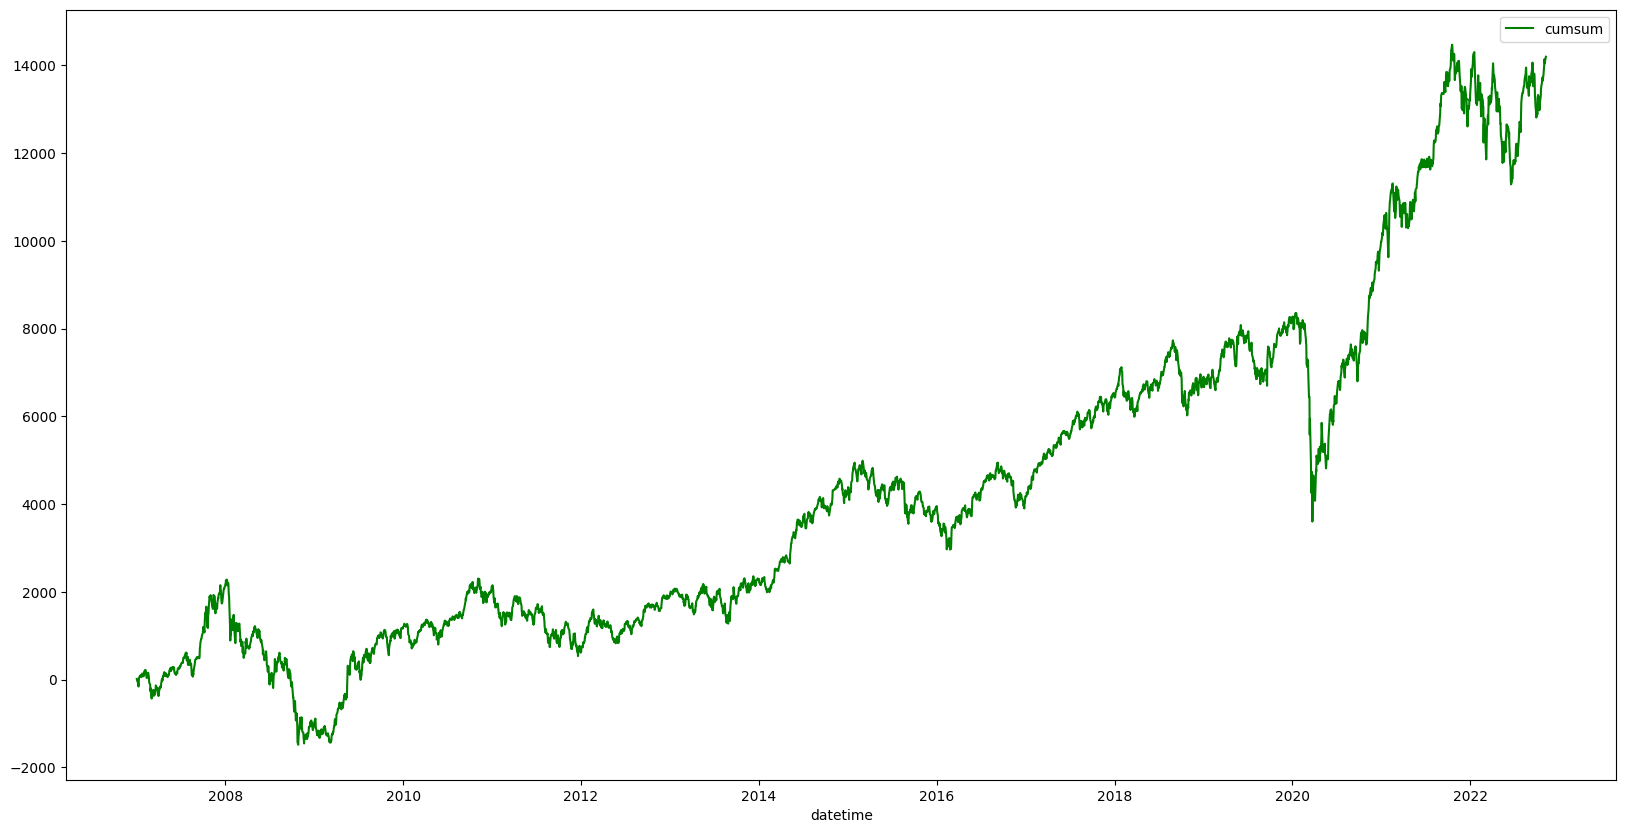

In [5]:
## cummulative returns in rupees / absolute returns
nifty_1day.plot(x = 'datetime', y = ['cumsum'], figsize=(20,10), color = "green")

In [6]:
 # now we plot dradown curve
drawdowns = []
running_max = 0
for date, val in zip(nifty_1day['datetime'], nifty_1day['cumsum' ]) :
    # date = (dt.datetime.strptime(date, "%d/%m/%Y")).strftime("%Y-%m-%d")
    date = date
    if (val>=running_max):
        drawdowns.append([date, 0])
        running_max = val
    else:
        drawdowns.append([date, val-running_max])
drawdown_df = pd.DataFrame(drawdowns)
drawdown_df.columns = ['DATE', 'DRAWDOWN']
drawdown_df.set_index("DATE",inplace=True)
drawdown_df

,DRAWDOWN
DATE,
2007-01-02,NaN
2007-01-03,0.00
2007-01-04,-35.25
2007-01-05,-40.65
2007-01-08,-90.65
...,...
2022-11-01,-331.65
2022-11-02,-394.20
2022-11-03,-424.35


<AxesSubplot: xlabel='DATE'>

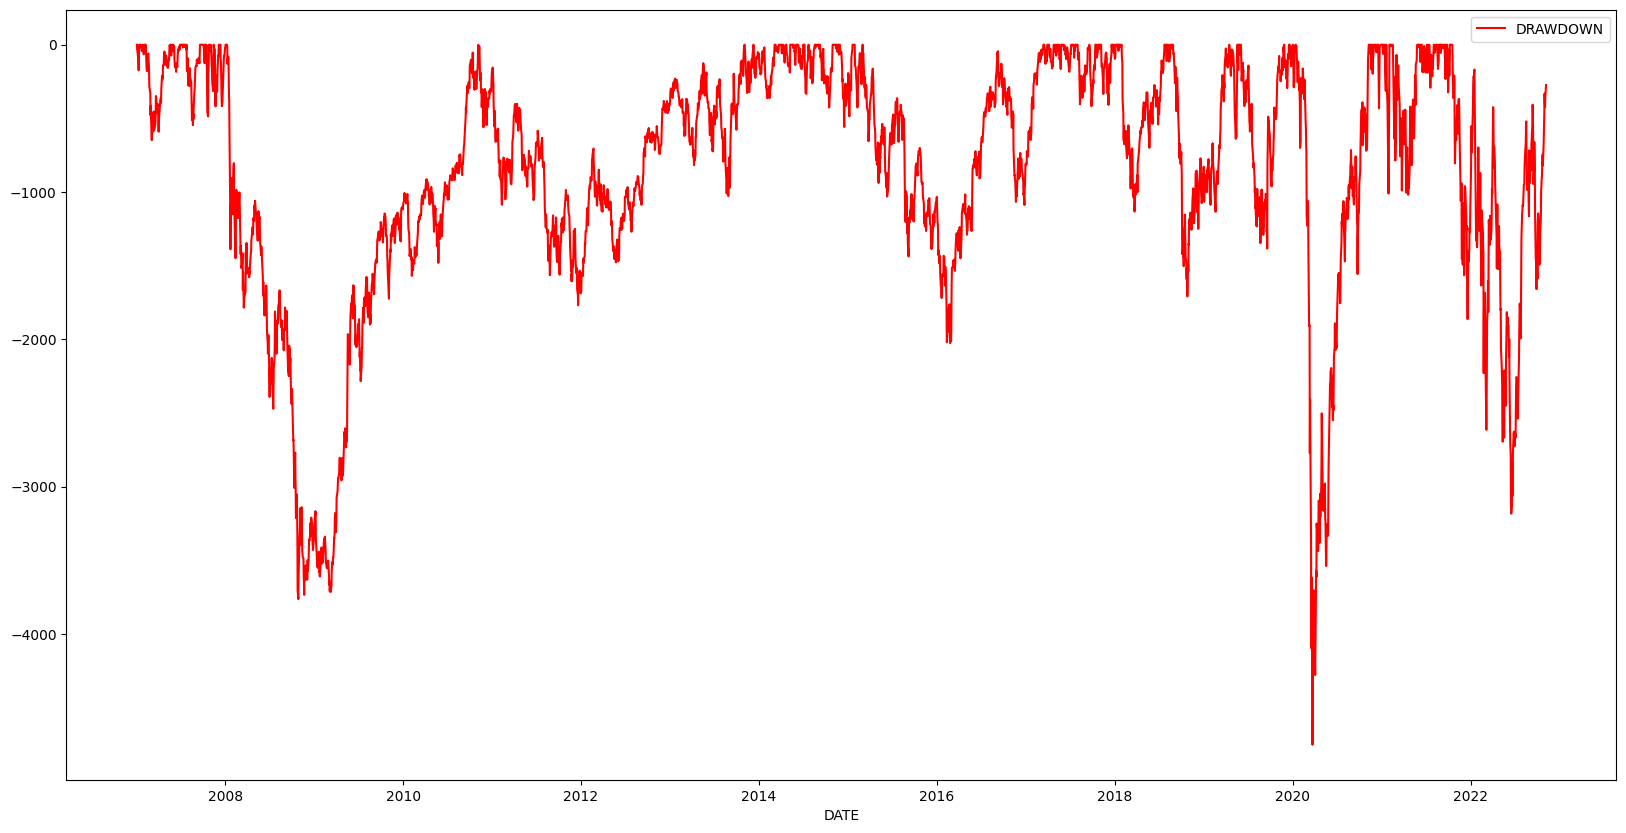

In [7]:
## absolute drawdowns
drawdown_df.plot(figsize=(20,10),color = 'red')

In [8]:
nifty_1day["drawdown"] = (nifty_1day["close"] / nifty_1day["close"].cummax() - 1)


In [9]:
nifty_1day

,datetime,open,high,low,close,volume,pct_returns,abs_returns,cumsum,cumulative_returns,drawdown
0,2007-01-02,3966.25,4016.65,3964.95,4007.40,277443911,NaN,NaN,NaN,NaN,0.000000
1,2007-01-03,4007.70,4029.80,3985.00,4024.05,336972857,0.004155,16.65,16.65,0.004155,0.000000
2,2007-01-04,4027.30,4041.00,3979.80,3988.80,369793444,-0.008760,-35.25,-18.60,-0.004641,-0.008760
3,2007-01-05,3990.15,4011.45,3969.65,3983.40,363396365,-0.001354,-5.40,-24.00,-0.005989,-0.010102
4,2007-01-08,3983.30,3987.45,3913.00,3933.40,345887697,-0.012552,-50.00,-74.00,-0.018466,-0.022527
...,...,...,...,...,...,...,...,...,...,...,...
3850,2022-11-01,18130.70,18175.80,18060.15,18145.40,248784199,0.007395,133.20,14138.00,3.527973,-0.017949
3851,2022-11-02,18177.90,18178.75,18048.65,18082.85,2053916079,-0.003447,-62.55,14075.45,3.512365,-0.021335
3852,2022-11-03,17968.35,18106.30,17959.20,18052.70,250997227,-0.001667,-30.15,14045.30,3.504841,-0.022966
3853,2022-11-04,18053.40,18135.10,18017.15,18117.15,263180073,0.003570,64.45,14109.75,3.520924,-0.019478


In [10]:
# Assuming you have a dataframe named "df" with a column "portfolio_value"
nifty_1day["cumulative_maximum"] = nifty_1day["cumsum"].cummax()
nifty_1day["drawdown"] = nifty_1day["cumsum"] - nifty_1day["cumulative_maximum"]
# nifty_1day["drawdown_pct"] = (nifty_1day["cumsum"] / nifty_1day["cumulative_maximum"] - 1) * 100
nifty_1day.drop(columns=["cumulative_maximum"],inplace=True)

# Calculate the absolute drawdown
max_drawdown = nifty_1day["drawdown"].min()
print("Absolute Drawdown: {:.2f}".format(max_drawdown))

# max_drawdown = nifty_1day["drawdown_pct"].min()
# print("Drawdown Percentage: {:.2f}%".format(max_drawdown))

Absolute Drawdown: -4752.05


In [11]:
# Calculate the percentage of time the strategy is in drawdown
drawdown_periods = nifty_1day[nifty_1day["drawdown"] < 0]['drawdown'].count()
total_periods = nifty_1day["cumsum"].count()
percent_in_drawdown = drawdown_periods / total_periods * 100
print("Percentage of time in drawdown: {:.2f}%".format(percent_in_drawdown))

Percentage of time in drawdown: 92.73%


In [13]:
nifty_1day[nifty_1day['drawdown']==0].reset_index()

,index,datetime,open,high,low,close,volume,pct_returns,abs_returns,cumsum,cumulative_returns,drawdown
0,1,2007-01-03,4007.70,4029.80,3985.00,4024.05,336972857,0.004155,16.65,16.65,0.004155,0.0
1,7,2007-01-12,3944.55,4059.15,3944.55,4052.45,562745428,0.052502,202.15,45.05,0.011242,0.0
2,8,2007-01-15,4052.85,4099.65,4052.40,4078.40,519304287,0.006404,25.95,71.00,0.017717,0.0
3,9,2007-01-16,4090.70,4107.45,4067.90,4080.50,529853418,0.000515,2.10,73.10,0.018241,0.0
4,11,2007-01-18,4075.20,4140.25,4075.20,4109.05,585093104,0.007997,32.60,101.65,0.025366,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
275,3588,2021-10-11,17867.55,18041.95,17839.10,17945.95,338224782,0.002836,50.75,13938.55,3.478203,0.0
276,3589,2021-10-12,17915.80,18008.65,17864.95,17991.95,377962605,0.002563,46.00,13984.55,3.489682,0.0
277,3590,2021-10-13,18097.85,18197.80,18050.75,18161.75,417399575,0.009438,169.80,14154.35,3.532053,0.0
278,3591,2021-10-14,18272.85,18350.75,18248.70,18338.55,346245314,0.009735,176.80,14331.15,3.576172,0.0


Monte Carle Simulation of drawdown

In [25]:
df_ret = nifty_1day[['datetime','pct_returns']].copy()
df_ret.rename(columns = {'datetime':'date','pct_returns':'ret'},inplace=True)

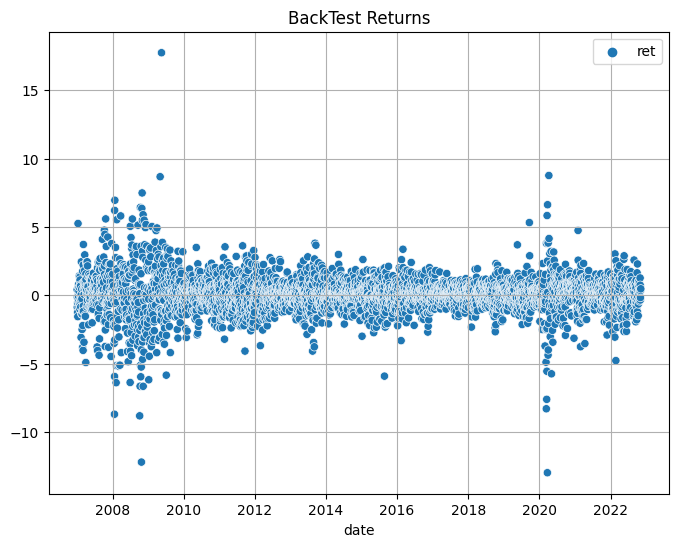

In [26]:
## Plot a Scatter Plot daily returns of the strategy to get an idea of distribution of returns. 
fig,ax=plt.subplots(1,1,figsize=(8,6),sharey=True)
sns.scatterplot(ax=ax,data=df_ret.set_index('date'))
ax.set_title('BackTest Returns')
ax.grid(True,axis='both')

In [52]:
# Create a Function to Calculate Maximum Drawdown for a given data series
def calc_max_dd(data_series):
    '''
    Inputs:
    data_series (pd.Series): A series of percentage returns of the strategy
    Returns:
    Maximum Drawdown (float)
    '''
    cumm_ret=data_series.cumsum()
    
    hwm=cumm_ret.cummax()
    dd=cumm_ret-hwm
    return round(dd.min(),2)

In [53]:
## Calculate Maximum Drawdown of Strategy in the Backtest
max_dd = calc_max_dd(df_ret['ret'])
print(f'The Maximum Drawdown of this Strategy Backtest is: {max_dd} and Total No. of Trades are: {len(df_ret)}')

The Maximum Drawdown of this Strategy Backtest is: -83.45 and Total No. of Trades are: 3855


<AxesSubplot: xlabel='date'>

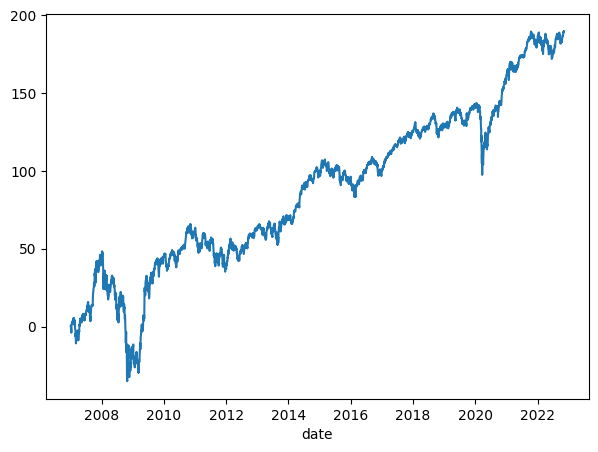

In [54]:
# Visualize the Equity Curve of Our Backtest
df_ret.set_index(df_ret['date'])['ret'].cumsum().plot(figsize=(7,5))

In [55]:
## Define a function to conduct Monte Carlo Simulations
def monte_carlo(simulations,df):
  '''
  Args
  simulations(int) : No. of Simulations to Run for Monte Carlo
  df (DataFrame): DataFrame of Returns with 'ret' as column name for returns
  '''
  mdd_list=[]
  for s in range(simulations):
    mdd=0
    reshuffle=df['ret'].sample(frac=1).reset_index(drop=True)
    plt.plot(reshuffle.cumsum())
    mdd=calc_max_dd(reshuffle)
    mdd_list.append(mdd)
  plt.plot(df['ret'].cumsum(),linewidth=3,color='black')
  plt.xlabel('Trade No.')
  plt.ylabel('Cummulative Returns')
  plt.title('Monte Carlo Simulation for {} Simulations'.format(simulations))
  plt.show()
  return mdd_list

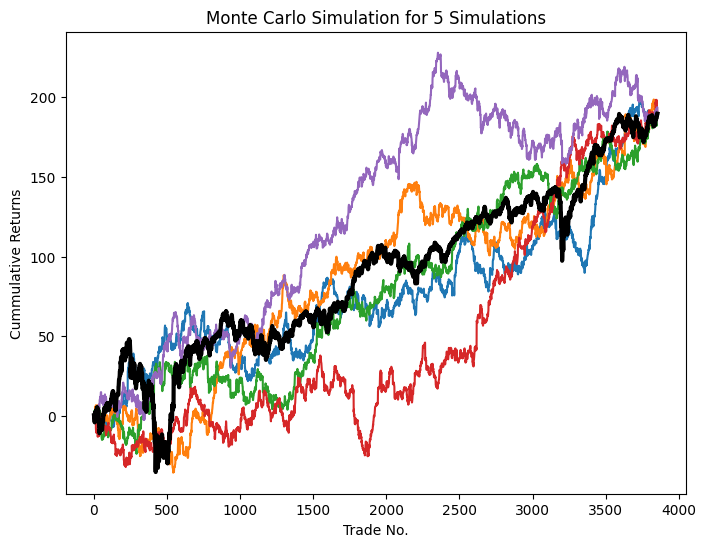

In [56]:
simulations=5
plt.figure(figsize=(8,6))
mdd_list=monte_carlo(simulations,df_ret)

In [57]:
mdd_list

[-49.05, -49.42, -35.94, -63.24, -69.57]

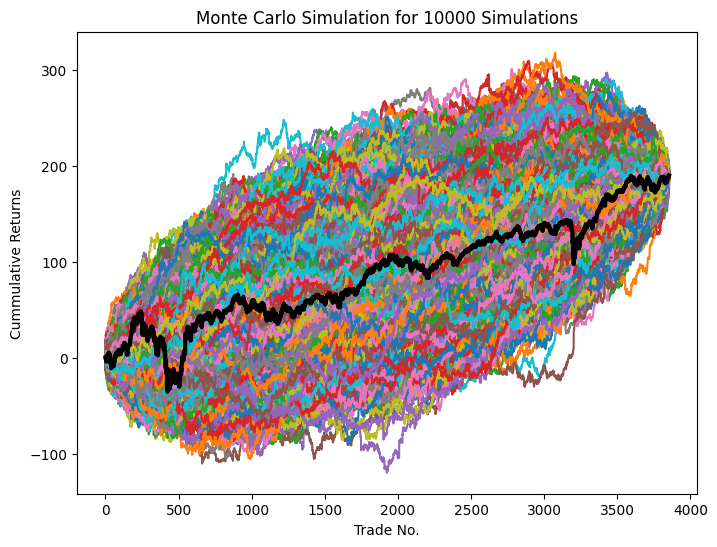

In [58]:
simulations=10000
plt.figure(figsize=(8,6))
mdd_list=monte_carlo(simulations,df_ret)

In [59]:
df_mdd=pd.DataFrame(mdd_list,columns=['Max DD'])


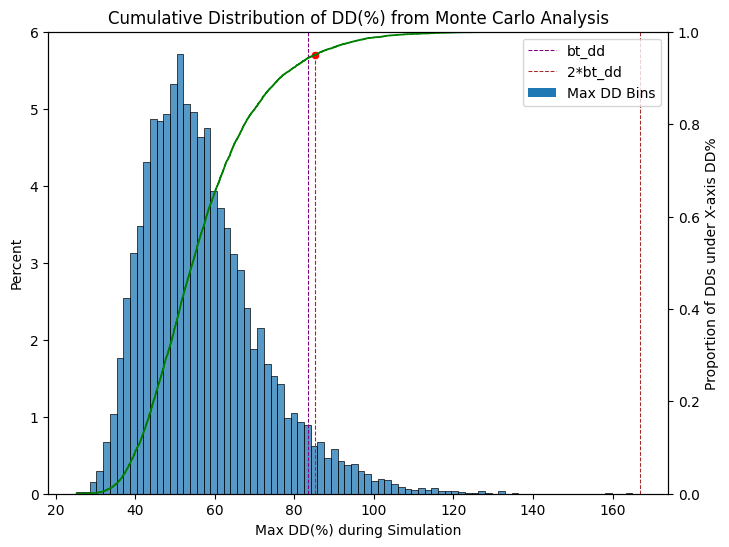

Backtest Drawdown: -83.45% , The 95.0 percentile of the Drawdown based on Monte Carlo is:85.27%


In [62]:
n_tile=0.95 # Cut-Off Percentile to plot 
n_tile_value=np.round(df_mdd['Max DD'].quantile(q=1-n_tile),2)
bt_dd=calc_max_dd(df_ret['ret'])
fig,ax=plt.subplots(1,1,figsize=(8,6))
sns.histplot(ax=ax,x=-1*df_mdd['Max DD'],stat='percent')#,cumulative=True)
ax.set_title('Cumulative Distribution of DD(%) from Monte Carlo Analysis')
ax.set_xlabel('Max DD(%) during Simulation')
ax.axvline(-bt_dd,ymax=1,color='purple',linestyle='dashed',linewidth=0.75)
ax.axvline(-2*bt_dd,ymax=1,color='brown',linestyle='dashed',linewidth=0.75)
ax.legend(labels=['bt_dd','2*bt_dd','Max DD Bins'])
ax2 = ax.twinx()
sns.ecdfplot(ax=ax2,x=-1*df_mdd['Max DD'],color='green',linewidth=1.25)
sns.scatterplot(x=[-1*n_tile_value],y=[n_tile],ax=ax2,color='red')
ax2.axvline(-1*n_tile_value,ymax=n_tile,color='red',linestyle='dashed',linewidth=0.8)
ax2.set_ylabel('Proportion of DDs under X-axis DD%')
plt.show()
print(f'Backtest Drawdown: {bt_dd}% , The {n_tile*100} percentile of the Drawdown based on Monte Carlo is:{-1*n_tile_value}%')

## Mean and Variances of Daily Gains

In [64]:
print('Stock Nifty Mean:', nifty_1day["pct_returns"].mean())
print('Stock Nifty Variances:', nifty_1day["pct_returns"].var())

Stock Nifty Mean: 0.049236645902995334
Stock Nifty Variances: 1.9899788402889451


## Highest volatality and draw the histogram distribution of daily returns for all the stock

/var/folders/vg/8g_zcrh55hz7zxvfsts892h80000gn/T/ipykernel_60990/1460318645.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nifty_1day['pct_returns'], hist = False, color = 'b' )


<AxesSubplot: xlabel='pct_returns', ylabel='Density'>

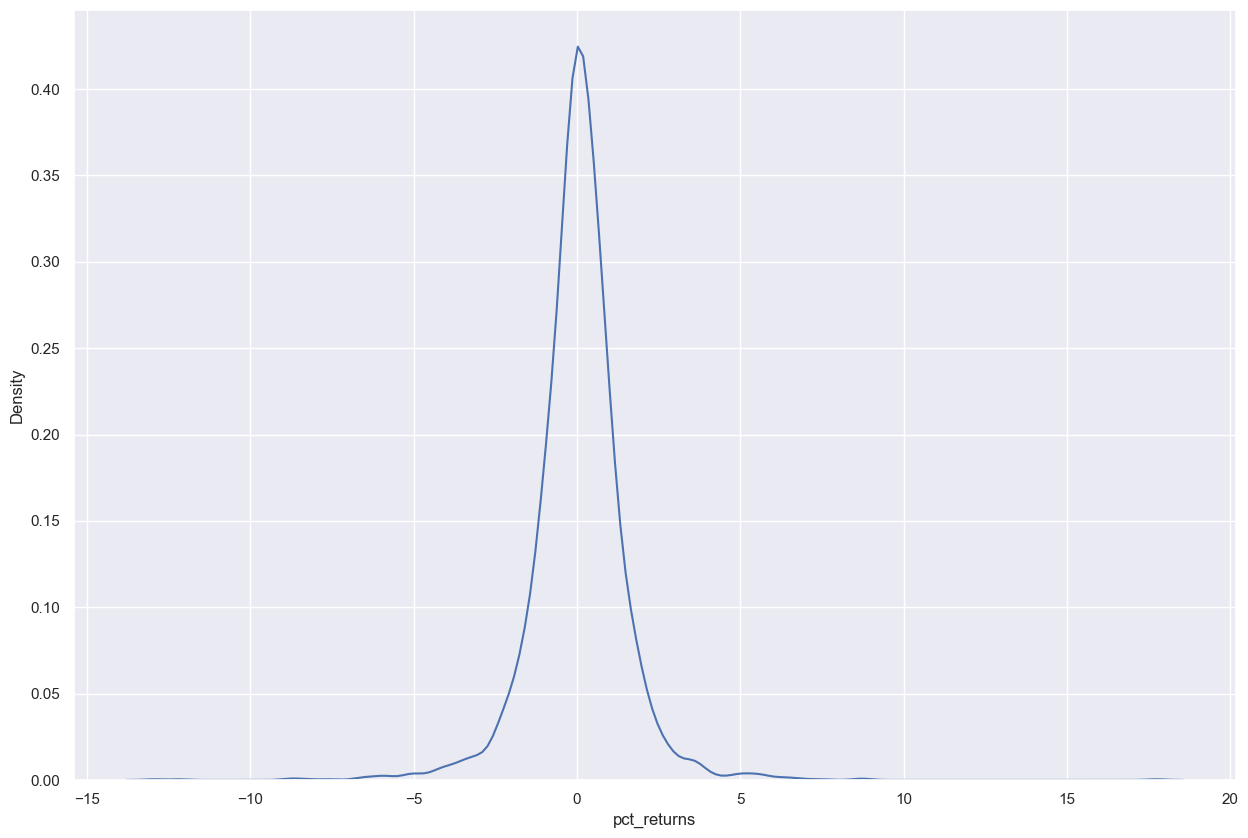

In [68]:
sns.set(rc={"figure.figsize": (15, 10)});
sns.distplot(nifty_1day['pct_returns'], hist = False, color = 'b' )

In [69]:
import sys

In [77]:
sys.path.append('../../')

In [80]:
from utils.metrics import *

In [81]:
nifty_1day['aa_returns'] = calculate_return_series(nifty_1day['close'])

In [85]:
nifty_1day


,datetime,open,high,low,close,volume,pct_returns,abs_returns,cumsum,cumulative_returns,aa_returns
0,2007-01-02,3966.25,4016.65,3964.95,4007.40,277443911,NaN,NaN,NaN,NaN,NaN
1,2007-01-03,4007.70,4029.80,3985.00,4024.05,336972857,0.415481,16.65,16.65,0.004155,0.004155
2,2007-01-04,4027.30,4041.00,3979.80,3988.80,369793444,-0.875983,-35.25,-18.60,-0.004641,-0.008760
3,2007-01-05,3990.15,4011.45,3969.65,3983.40,363396365,-0.135379,-5.40,-24.00,-0.005989,-0.001354
4,2007-01-08,3983.30,3987.45,3913.00,3933.40,345887697,-1.255209,-50.00,-74.00,-0.018466,-0.012552
...,...,...,...,...,...,...,...,...,...,...,...
3850,2022-11-01,18130.70,18175.80,18060.15,18145.40,248784199,0.739499,133.20,14138.00,3.527973,0.007395
3851,2022-11-02,18177.90,18178.75,18048.65,18082.85,2053916079,-0.344715,-62.55,14075.45,3.512365,-0.003447
3852,2022-11-03,17968.35,18106.30,17959.20,18052.70,250997227,-0.166733,-30.15,14045.30,3.504841,-0.001667
3853,2022-11-04,18053.40,18135.10,18017.15,18117.15,263180073,0.357010,64.45,14109.75,3.520924,0.003570


In [86]:
nifty_1day.set_index('datetime',inplace=True)

## Calculating Metrics

In [88]:
calculate_cagr(nifty_1day['close'])*100

10.021401545564323

In [89]:
calculate_annualized_volatility(nifty_1day['close'])

60548.66535714554

In [90]:
calculate_sharpe_ratio(nifty_1day['close'])

0.45547148463214826

In [91]:
calculate_pure_profit_score(nifty_1day['close'])

0.08570235219705832

In [92]:
calculate_max_drawdown(nifty_1day['close'])

0.9126950190381464

In [95]:
nifty_1day.sort_index(inplace=True)

## Decomposition of seasonality, trend and residuals

In [122]:
decomposition_results = seasonal_decompose(nifty_1day['close'],model='multiplicative',period=260)

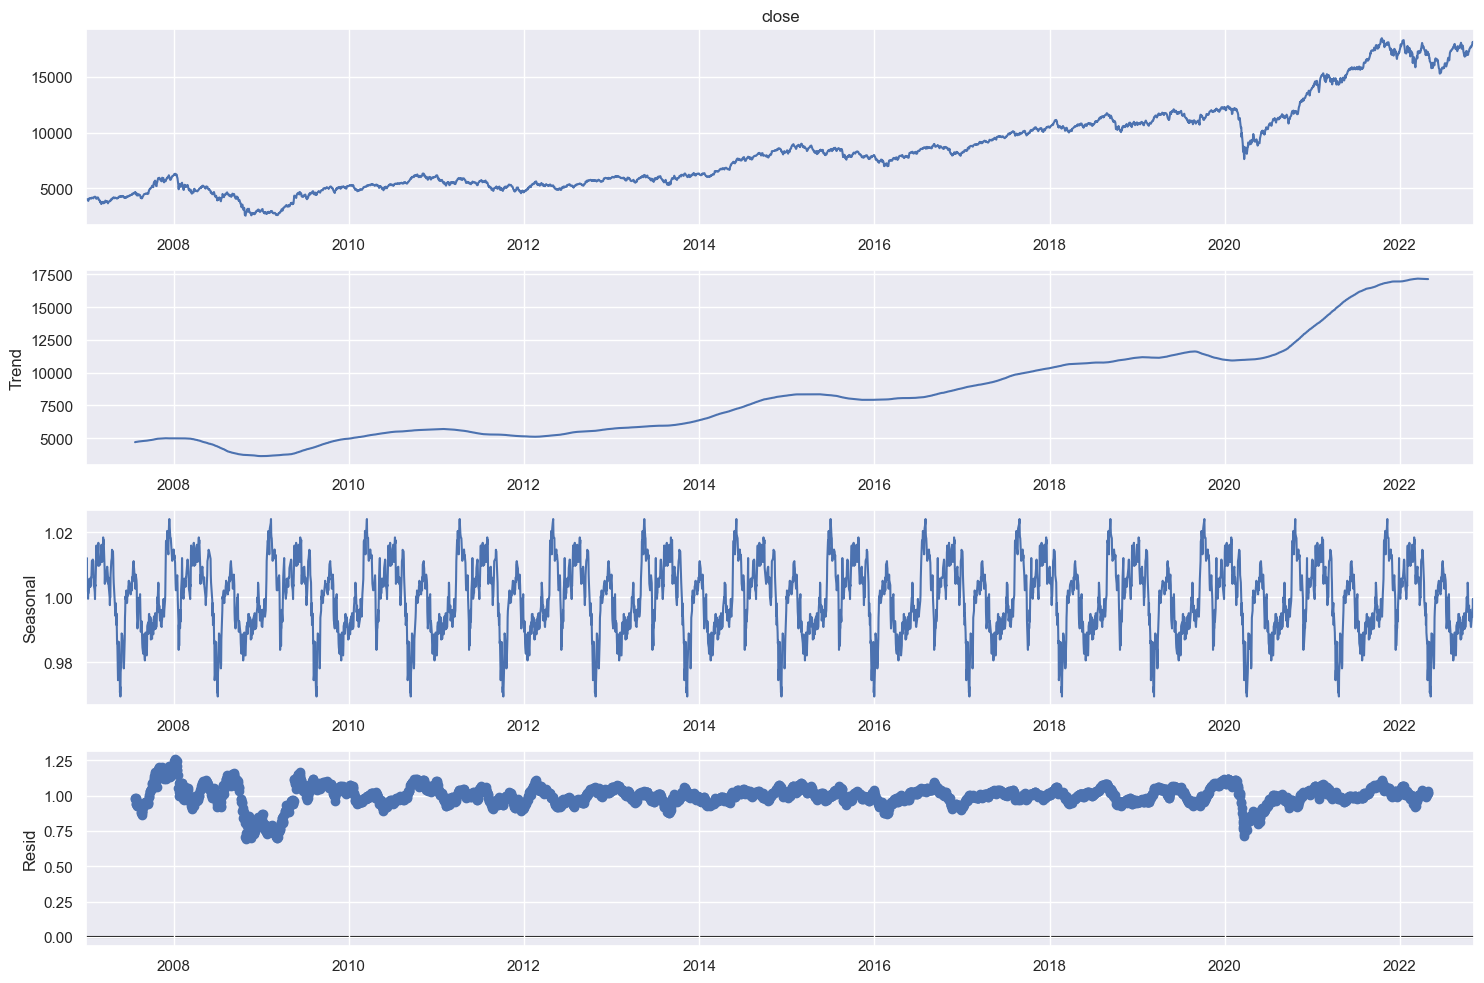

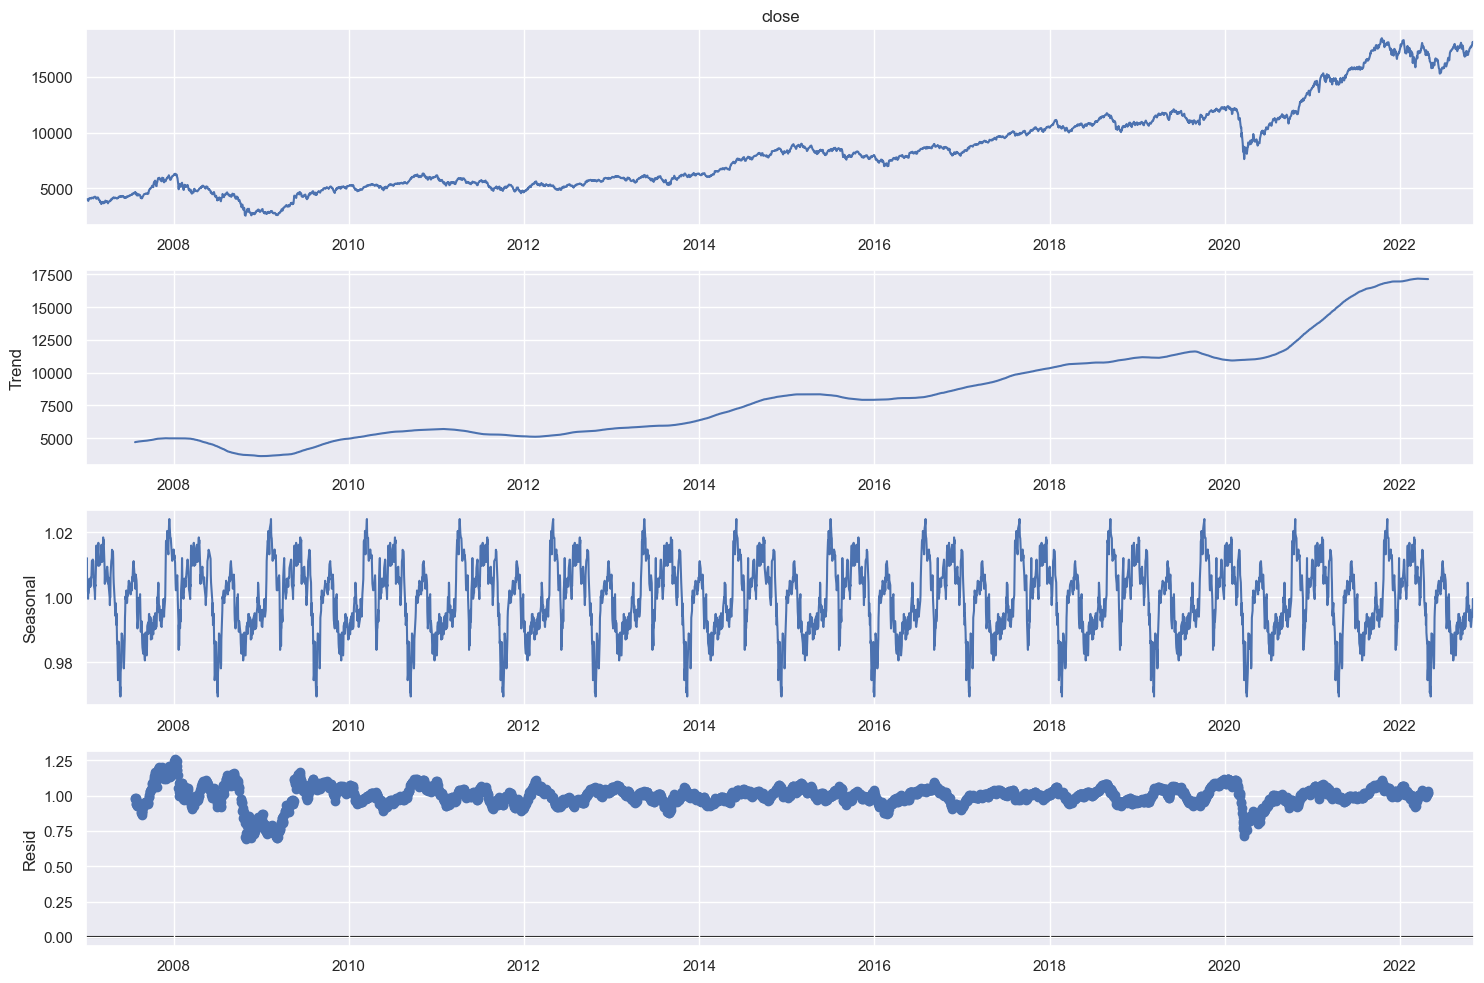

In [126]:
decomposition_results.plot()